In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Importing dataset
df=pd.read_csv('onlinedeliverydataforchurnpred.csv')

In [4]:
df

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Family_size,Pin code,Medium,Meal,Perference,...,Residence_in_busy_location,Influence_of_rating,Less_Delivery_time,High_Quality_of_package,Politeness,Freshness,Temperature,Good_Taste,Good_Quantity,Output
0,20,Female,Single,Student,No Income,4,560001,Food delivery apps,Breakfast,Non Veg foods (Lunch / Dinner),...,Agree,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes
1,24,Female,Single,Student,Below Rs.10000,3,560009,Food delivery apps,Snacks,Non Veg foods (Lunch / Dinner),...,Strongly Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes
2,22,Male,Single,Student,Below Rs.10000,3,560017,Food delivery apps,Lunch,Non Veg foods (Lunch / Dinner),...,Agree,Yes,Important,Very Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes
3,22,Female,Single,Student,No Income,6,560019,Food delivery apps,Snacks,Veg foods (Breakfast / Lunch / Dinner),...,Disagree,Yes,Very Important,Important,Very Important,Very Important,Very Important,Very Important,Important,Yes
4,22,Male,Single,Student,Below Rs.10000,4,560010,Walk-in,Lunch,Non Veg foods (Lunch / Dinner),...,Agree,Yes,Important,Important,Important,Important,Important,Very Important,Very Important,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,2,560001,Food delivery apps,Dinner,Non Veg foods (Lunch / Dinner),...,Disagree,Maybe,Important,Important,Important,Important,Important,Important,Important,Yes
384,23,Female,Single,Student,No Income,4,560048,Food delivery apps,Lunch,Non Veg foods (Lunch / Dinner),...,Agree,Yes,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes
385,22,Female,Single,Student,No Income,5,560010,Food delivery apps,Snacks,Non Veg foods (Lunch / Dinner),...,Agree,Yes,Important,Very Important,Important,Very Important,Very Important,Very Important,Very Important,Yes
386,23,Male,Single,Student,Below Rs.10000,2,560009,Food delivery apps,Lunch,Non Veg foods (Lunch / Dinner),...,Strongly Agree,Yes,Important,Very Important,Very Important,Very Important,Important,Very Important,Very Important,Yes


In [5]:
df.shape

(388, 36)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  388 non-null    int64 
 1   Gender                               388 non-null    object
 2   Marital_Status                       388 non-null    object
 3   Occupation                           388 non-null    object
 4   Monthly_Income                       388 non-null    object
 5   Family_size                          388 non-null    int64 
 6   Pin code                             388 non-null    int64 
 7   Medium                               388 non-null    object
 8   Meal                                 388 non-null    object
 9   Perference                           388 non-null    object
 10  Ease_and_convenient                  388 non-null    object
 11  Time_saving                          388 non-

In [7]:
df.describe()

,Age,Family_size,Pin code
count,388.000000,388.000000,388.000000
mean,24.628866,3.280928,560040.113402
std,2.975593,1.351025,31.399609
min,18.000000,1.000000,560001.000000
25%,23.000000,2.000000,560010.750000
50%,24.000000,3.000000,560033.500000
75%,26.000000,4.000000,560068.000000
max,33.000000,6.000000,560109.000000


In [8]:
#To check if our dataset contains any null/NA value
#pd.isnull(df)
df.isnull().values.any()

False

In [9]:
#If we NA values exist, then to find total count of NA values
df.isnull().sum()

Age                                    0
Gender                                 0
Marital_Status                         0
Occupation                             0
Monthly_Income                         0
Family_size                            0
Pin code                               0
Medium                                 0
Meal                                   0
Perference                             0
Ease_and_convenient                    0
Time_saving                            0
Easy_Payment_option                    0
More_Offers_and_Discount               0
Good_Food_quality                      0
Good_Tracking_system                   0
Late_Delivery                          0
Poor_Hygiene                           0
Bad_past_experience                    0
Long_delivery_time                     0
Delay_in_assigning_delivery_ person    0
Delay_in_picking_up_food               0
Wrong_order_delivered                  0
Missing_item                           0
Order Time      

### NO missing values


In [10]:
#import pandas_profiling as pp

In [11]:
#report = pp.ProfileReport(df)
#report.to_file("report.html")

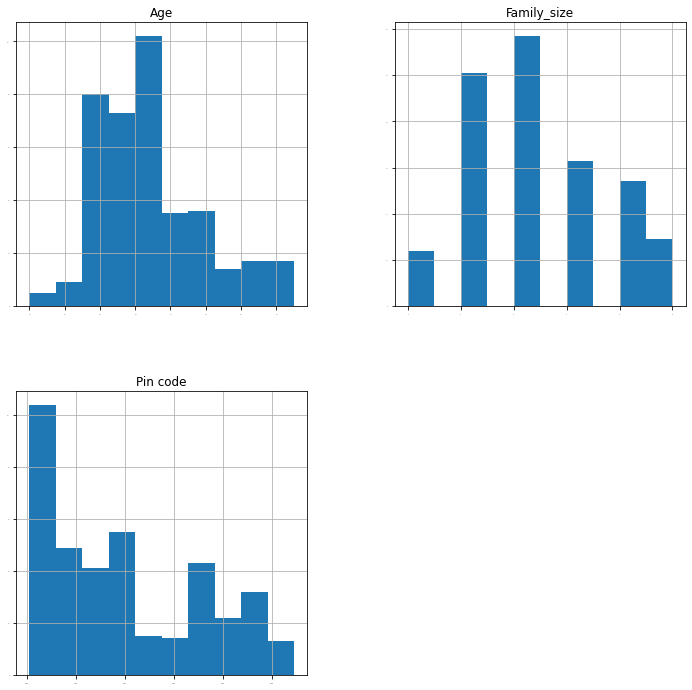

In [12]:
# to plot histograms (to check distribution of variables) of all the variables in a dataframe
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(12,12))
plt.show()

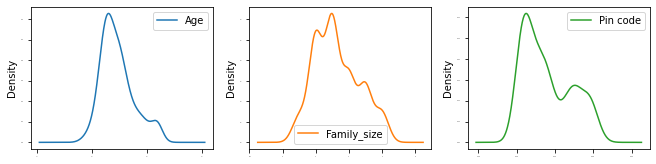

In [13]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

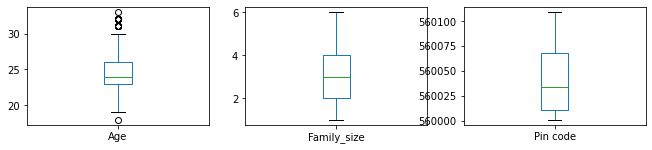

In [14]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        fontsize=10, figsize = (15, 10))
plt.show()

In [15]:
df.skew()

Age            0.809877
Family_size    0.401376
Pin code       0.574913
dtype: float64

In [10]:
df.rename(columns = {'Pin code':'Pin_code','Delay_in_assigning_delivery_ person':'Delay_in_assigning_delivery_person','Order Time':'Order_Time','Maximum wait time':'Maximum_wait_time','Freshness ':'Freshness','Good_Taste ':'Good_Taste'}, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 388 non-null    int64 
 1   Gender                              388 non-null    object
 2   Marital_Status                      388 non-null    object
 3   Occupation                          388 non-null    object
 4   Monthly_Income                      388 non-null    object
 5   Family_size                         388 non-null    int64 
 6   Pin_code                            388 non-null    int64 
 7   Medium                              388 non-null    object
 8   Meal                                388 non-null    object
 9   Perference                          388 non-null    object
 10  Ease_and_convenient                 388 non-null    object
 11  Time_saving                         388 non-null    object

In [12]:
col=df.columns.drop(['Age','Family_size','Pin_code'])
col

Index(['Gender', 'Marital_Status', 'Occupation', 'Monthly_Income', 'Medium',
       'Meal', 'Perference', 'Ease_and_convenient', 'Time_saving',
       'Easy_Payment_option', 'More_Offers_and_Discount', 'Good_Food_quality',
       'Good_Tracking_system', 'Late_Delivery', 'Poor_Hygiene',
       'Bad_past_experience', 'Long_delivery_time',
       'Delay_in_assigning_delivery_person', 'Delay_in_picking_up_food',
       'Wrong_order_delivered', 'Missing_item', 'Order_Time',
       'Maximum_wait_time', 'Residence_in_busy_location',
       'Influence_of_rating', 'Less_Delivery_time', 'High_Quality_of_package',
       'Politeness', 'Freshness', 'Temperature', 'Good_Taste', 'Good_Quantity',
       'Output'],
      dtype='object')

In [13]:
df[col] = df[col].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 388 non-null    int64   
 1   Gender                              388 non-null    category
 2   Marital_Status                      388 non-null    category
 3   Occupation                          388 non-null    category
 4   Monthly_Income                      388 non-null    category
 5   Family_size                         388 non-null    int64   
 6   Pin_code                            388 non-null    int64   
 7   Medium                              388 non-null    category
 8   Meal                                388 non-null    category
 9   Perference                          388 non-null    category
 10  Ease_and_convenient                 388 non-null    category
 11  Time_saving                     

In [15]:
df1=df

In [16]:
df1.Output.value_counts()

Yes    301
No      87
Name: Output, dtype: int64

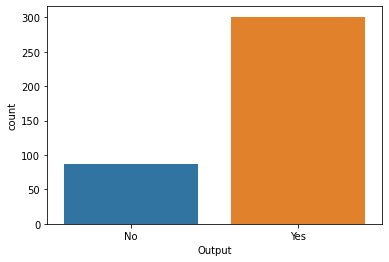

In [23]:
sns.countplot(x = 'Output', data = df1)
plt.show()

In [17]:
count_churn = len(df1[df1['Output']=='Yes'])
count_not_churn = len(df1[df1['Output']=='No'])
pct_of_churn = count_churn / (count_not_churn+count_churn)
print("percentage of churn customer is", pct_of_churn*100)
pct_of_not_churn = count_not_churn / (count_not_churn+count_churn)
print("percentage of not churn customer", pct_of_not_churn*100)

percentage of churn customer is 77.57731958762886
percentage of not churn customer 22.422680412371136


### our class is imbalnced we can see churn ratio is 78:22, we will use SMOTE to handle imbalanced data.

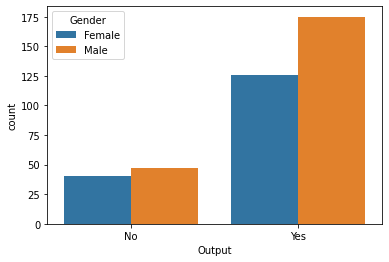

In [25]:
sns.countplot(x = 'Output', hue = 'Gender', data = df1)
plt.show()

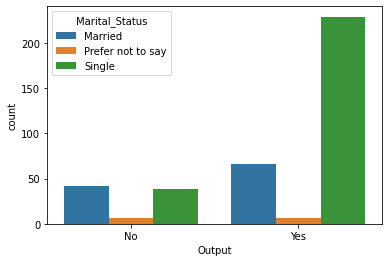

In [26]:
sns.countplot(x = 'Output', hue = 'Marital_Status', data = df1)
plt.show()

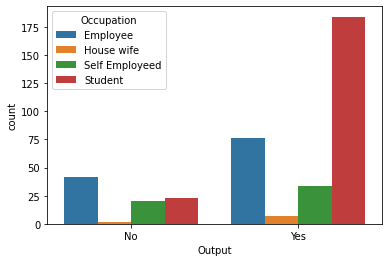

In [27]:
sns.countplot(x = 'Output', hue = 'Occupation', data = df1)
plt.show()

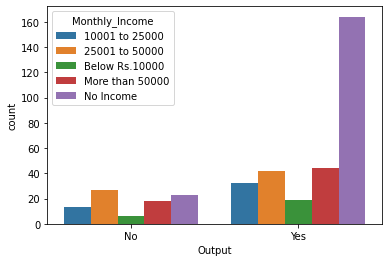

In [28]:
sns.countplot(x = 'Output', hue = 'Monthly_Income', data = df1)
plt.show()

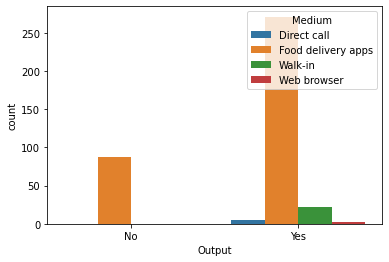

In [29]:
sns.countplot(x = 'Output', hue = 'Medium', data = df1)
plt.show()

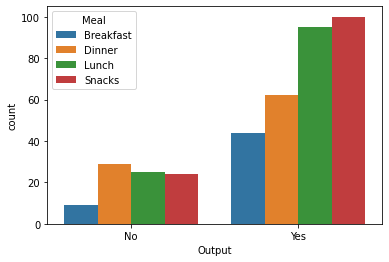

In [30]:
sns.countplot(x = 'Output', hue = 'Meal', data = df1)
plt.show()

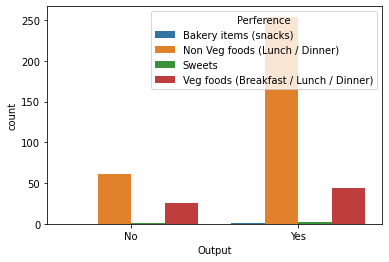

In [31]:
sns.countplot(x = 'Output', hue = 'Perference', data = df1)
plt.show()

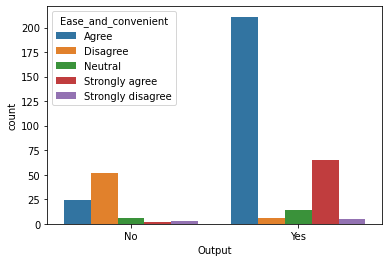

In [32]:
sns.countplot(x = 'Output', hue = 'Ease_and_convenient', data = df1)
plt.show()

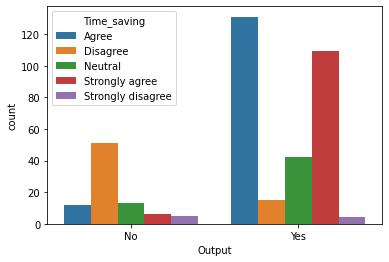

In [33]:
sns.countplot(x = 'Output', hue = 'Time_saving', data = df1)
plt.show()

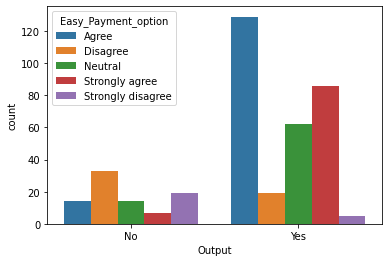

In [34]:
sns.countplot(x = 'Output', hue = 'Easy_Payment_option', data = df1)
plt.show()

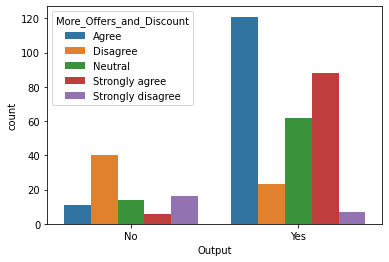

In [35]:
sns.countplot(x = 'Output', hue = 'More_Offers_and_Discount', data = df1)
plt.show()

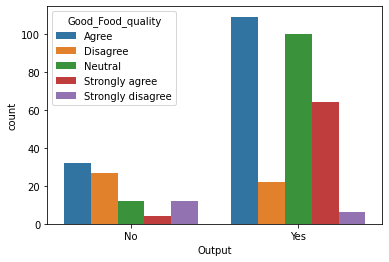

In [36]:
sns.countplot(x = 'Output', hue = 'Good_Food_quality', data = df1)
plt.show()

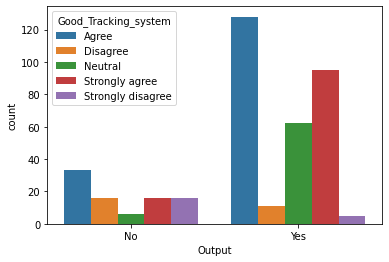

In [37]:
sns.countplot(x = 'Output', hue = 'Good_Tracking_system', data = df1)
plt.show()

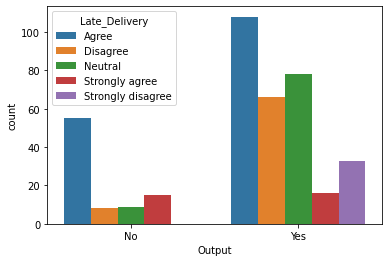

In [38]:
sns.countplot(x = 'Output', hue = 'Late_Delivery', data = df1)
plt.show()

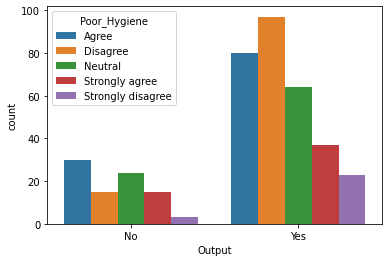

In [39]:
sns.countplot(x = 'Output', hue = 'Poor_Hygiene', data = df1)
plt.show()

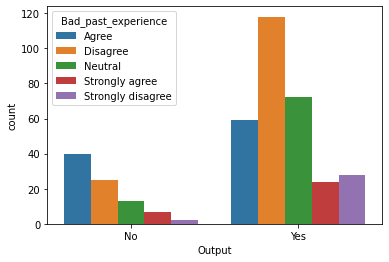

In [40]:
sns.countplot(x = 'Output', hue = 'Bad_past_experience', data = df1)
plt.show()

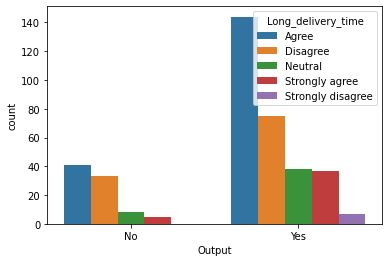

In [41]:
sns.countplot(x = 'Output', hue = 'Long_delivery_time', data = df1)
plt.show()

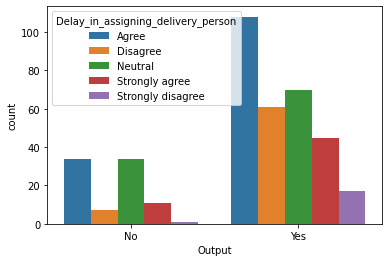

In [42]:
sns.countplot(x = 'Output', hue = 'Delay_in_assigning_delivery_person', data = df1)
plt.show()

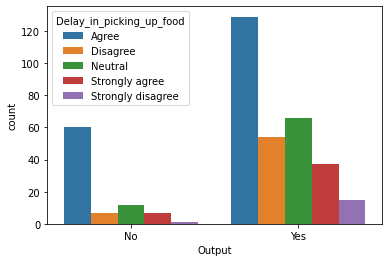

In [43]:
sns.countplot(x = 'Output', hue = 'Delay_in_picking_up_food', data = df1)
plt.show()

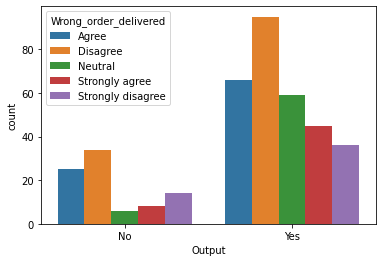

In [44]:
sns.countplot(x = 'Output', hue = 'Wrong_order_delivered', data = df1)
plt.show()

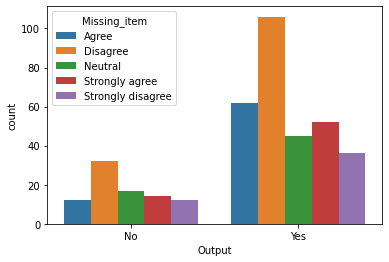

In [45]:
sns.countplot(x = 'Output', hue = 'Missing_item', data = df1)
plt.show()

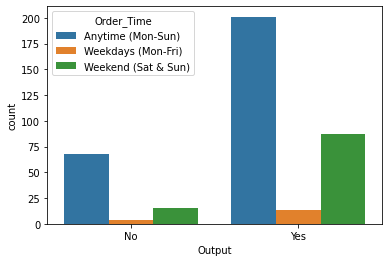

In [46]:
sns.countplot(x = 'Output', hue = 'Order_Time', data = df1)
plt.show()

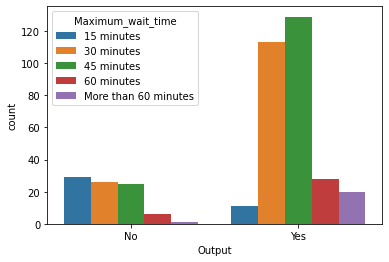

In [47]:
sns.countplot(x = 'Output', hue = 'Maximum_wait_time', data = df1)
plt.show()

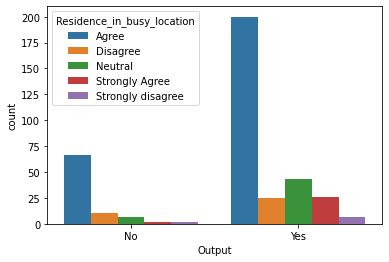

In [48]:
sns.countplot(x = 'Output', hue = 'Residence_in_busy_location', data = df1)
plt.show()

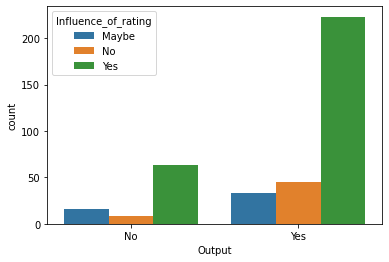

In [49]:
sns.countplot(x = 'Output', hue = 'Influence_of_rating', data = df1)
plt.show()

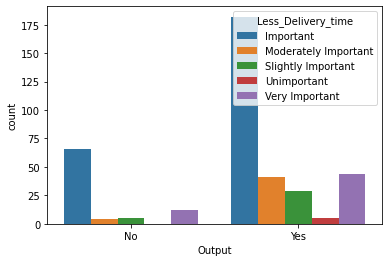

In [50]:
sns.countplot(x = 'Output', hue = 'Less_Delivery_time', data = df1)
plt.show()

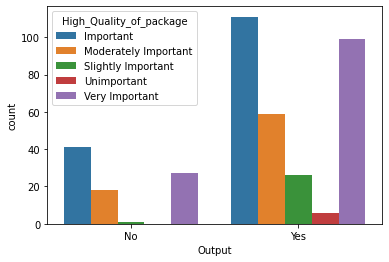

In [51]:
sns.countplot(x = 'Output', hue = 'High_Quality_of_package', data = df1)
plt.show()

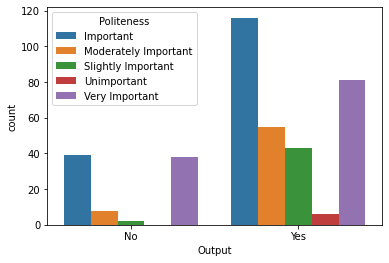

In [52]:
sns.countplot(x = 'Output', hue = 'Politeness', data = df1)
plt.show()

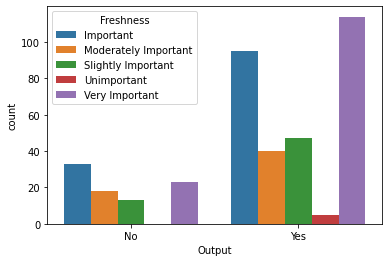

In [53]:
sns.countplot(x = 'Output', hue = 'Freshness', data = df1)
plt.show()

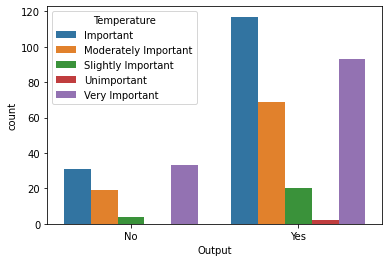

In [54]:
sns.countplot(x = 'Output', hue = 'Temperature', data = df1)
plt.show()

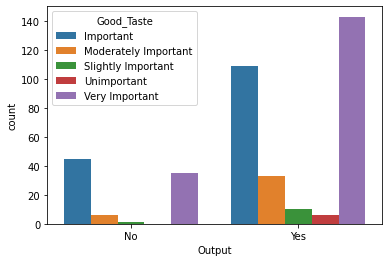

In [55]:
sns.countplot(x = 'Output', hue = 'Good_Taste', data = df1)
plt.show()

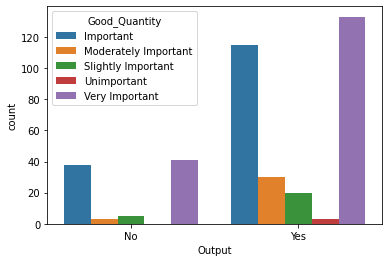

In [56]:
sns.countplot(x = 'Output', hue = 'Good_Quantity', data = df1)
plt.show()

### all categorical features are important for prediction, considering all features soon above

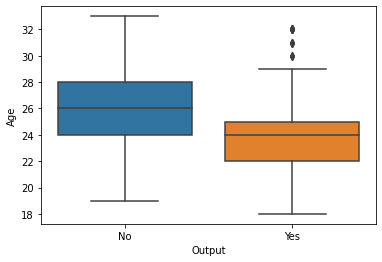

In [57]:
sns.boxplot( y = df1.Age,  x = df1.Output)
plt.show()

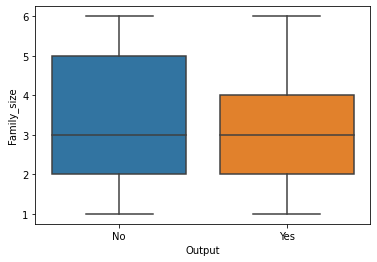

In [58]:
sns.boxplot( y = df1.Family_size,  x = df1.Output)
plt.show()

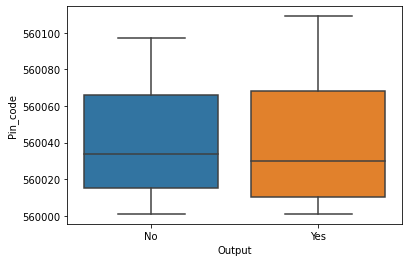

In [59]:
sns.boxplot( y = df1.Pin_code,  x = df1.Output)
plt.show()

### here Age is good predictor for output.
### we can drop Family_Size and Pin_code as no much changes seen for predicitng output

In [18]:
df2 = df1.drop(['Family_size', 'Pin_code'], axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 388 non-null    int64   
 1   Gender                              388 non-null    category
 2   Marital_Status                      388 non-null    category
 3   Occupation                          388 non-null    category
 4   Monthly_Income                      388 non-null    category
 5   Medium                              388 non-null    category
 6   Meal                                388 non-null    category
 7   Perference                          388 non-null    category
 8   Ease_and_convenient                 388 non-null    category
 9   Time_saving                         388 non-null    category
 10  Easy_Payment_option                 388 non-null    category
 11  More_Offers_and_Discount        

In [19]:
df3=df2

In [20]:
df3.columns

Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Medium', 'Meal', 'Perference', 'Ease_and_convenient', 'Time_saving',
       'Easy_Payment_option', 'More_Offers_and_Discount', 'Good_Food_quality',
       'Good_Tracking_system', 'Late_Delivery', 'Poor_Hygiene',
       'Bad_past_experience', 'Long_delivery_time',
       'Delay_in_assigning_delivery_person', 'Delay_in_picking_up_food',
       'Wrong_order_delivered', 'Missing_item', 'Order_Time',
       'Maximum_wait_time', 'Residence_in_busy_location',
       'Influence_of_rating', 'Less_Delivery_time', 'High_Quality_of_package',
       'Politeness', 'Freshness', 'Temperature', 'Good_Taste', 'Good_Quantity',
       'Output'],
      dtype='object')

In [21]:
cat_vars=['Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Medium', 'Meal', 'Perference', 'Ease_and_convenient', 'Time_saving',
       'Easy_Payment_option', 'More_Offers_and_Discount', 'Good_Food_quality',
       'Good_Tracking_system', 'Late_Delivery', 'Poor_Hygiene',
       'Bad_past_experience', 'Long_delivery_time',
       'Delay_in_assigning_delivery_person', 'Delay_in_picking_up_food',
       'Wrong_order_delivered', 'Missing_item', 'Order_Time',
       'Maximum_wait_time', 'Residence_in_busy_location',
       'Influence_of_rating', 'Less_Delivery_time', 'High_Quality_of_package',
       'Politeness', 'Freshness', 'Temperature', 'Good_Taste', 'Good_Quantity',]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df3[var], prefix=var,drop_first=True)
    data1=df3.join(cat_list)
    df3=data1

In [22]:
df3.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Medium,Meal,Perference,Ease_and_convenient,Time_saving,...,Temperature_Unimportant,Temperature_Very Important,Good_Taste_Moderately Important,Good_Taste_Slightly Important,Good_Taste_Unimportant,Good_Taste_Very Important,Good_Quantity_Moderately Important,Good_Quantity_Slightly Important,Good_Quantity_Unimportant,Good_Quantity_Very Important
0,20,Female,Single,Student,No Income,Food delivery apps,Breakfast,Non Veg foods (Lunch / Dinner),Neutral,Neutral,...,0,0,1,0,0,0,1,0,0,0
1,24,Female,Single,Student,Below Rs.10000,Food delivery apps,Snacks,Non Veg foods (Lunch / Dinner),Strongly agree,Strongly agree,...,0,1,0,0,0,1,0,0,0,1
2,22,Male,Single,Student,Below Rs.10000,Food delivery apps,Lunch,Non Veg foods (Lunch / Dinner),Strongly agree,Strongly agree,...,0,0,0,0,0,1,1,0,0,0
3,22,Female,Single,Student,No Income,Food delivery apps,Snacks,Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,...,0,1,0,0,0,1,0,0,0,0
4,22,Male,Single,Student,Below Rs.10000,Walk-in,Lunch,Non Veg foods (Lunch / Dinner),Agree,Agree,...,0,0,0,0,0,1,0,0,0,1


In [23]:
cat_vars=['Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Medium', 'Meal', 'Perference', 'Ease_and_convenient', 'Time_saving',
       'Easy_Payment_option', 'More_Offers_and_Discount', 'Good_Food_quality',
       'Good_Tracking_system', 'Late_Delivery', 'Poor_Hygiene',
       'Bad_past_experience', 'Long_delivery_time',
       'Delay_in_assigning_delivery_person', 'Delay_in_picking_up_food',
       'Wrong_order_delivered', 'Missing_item', 'Order_Time',
       'Maximum_wait_time', 'Residence_in_busy_location',
       'Influence_of_rating', 'Less_Delivery_time', 'High_Quality_of_package',
       'Politeness', 'Freshness', 'Temperature', 'Good_Taste', 'Good_Quantity',]
data_vars=df3.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [24]:
data_final=df3[to_keep]
data_final.columns.values

array(['Age', 'Output', 'Gender_Male', 'Marital_Status_Prefer not to say',
       'Marital_Status_Single', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Monthly_Income_25001 to 50000', 'Monthly_Income_Below Rs.10000',
       'Monthly_Income_More than 50000', 'Monthly_Income_No Income',
       'Medium_Food delivery apps', 'Medium_Walk-in',
       'Medium_Web browser', 'Meal_Dinner', 'Meal_Lunch', 'Meal_Snacks',
       'Perference_Non Veg foods (Lunch / Dinner)', 'Perference_Sweets',
       'Perference_Veg foods (Breakfast / Lunch / Dinner)',
       'Ease_and_convenient_Disagree', 'Ease_and_convenient_Neutral',
       'Ease_and_convenient_Strongly agree',
       'Ease_and_convenient_Strongly disagree', 'Time_saving_Disagree',
       'Time_saving_Neutral', 'Time_saving_Strongly agree',
       'Time_saving_Strongly disagree', 'Easy_Payment_option_Disagree',
       'Easy_Payment_option_Neutral',
       'Easy_Payment_option_Strongly agree',
      

In [25]:
data_final.head(3)

,Age,Output,Gender_Male,Marital_Status_Prefer not to say,Marital_Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly_Income_25001 to 50000,Monthly_Income_Below Rs.10000,...,Temperature_Unimportant,Temperature_Very Important,Good_Taste_Moderately Important,Good_Taste_Slightly Important,Good_Taste_Unimportant,Good_Taste_Very Important,Good_Quantity_Moderately Important,Good_Quantity_Slightly Important,Good_Quantity_Unimportant,Good_Quantity_Very Important
0,20,Yes,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,24,Yes,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,22,Yes,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0


In [26]:


data_final.shape

(388, 117)

In [27]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Columns: 117 entries, Age to Good_Quantity_Very Important
dtypes: category(1), int64(1), uint8(115)
memory usage: 47.2 KB


#### converted target variable content from Yes/No to 1/0.

In [28]:
data_final.Output=data_final.Output.map(dict(Yes=1, No=0))

C:\Users\mahesh\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [29]:
data_final.Output.value_counts()

1    301
0     87
Name: Output, dtype: int64

In [33]:
data_final.Output.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [72]:
X = data_final.drop('Output', axis = 1)
y = data_final['Output']
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_te st_split(X, y, test_size = test_size, random_state = seed, stratify = y)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((271, 116), (117, 116), (271,), (117,))

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
oversampling = SMOTE(sampling_strategy = 0.5)

In [76]:
X_res, y_res = oversampling.fit_resample(X_train, y_train)

In [77]:
X_res.shape, y_res.shape

((315, 116), (315,))

In [78]:
from collections import Counter

In [79]:
Counter(y_res)

Counter({1: 210, 0: 105})

In [80]:
#from imblearn.over_sampling import SMOTE
#os = SMOTE(random_state=0)

In [81]:
data_final_vars=data_final.columns.values.tolist()
y=['Output']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_res, y_res.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[False  True False False False False  True False False False  True  True
  True False False False False  True False False  True False  True False
  True  True False False  True False False False  True False  True  True
 False  True  True False False  True False  True  True  True  True  True
  True False  True  True  True  True  True False False False False False
  True  True False  True False  True  True False False False False False
  True False  True  True  True False  True  True  True  True  True False
  True False  True  True  True False False False False  True False  True
  True  True  True False  True False  True False  True False False  True
  True False False  True  True False False False]
[26  1  3 47 13 32  1  7 36 22  1  1  1 45 51 19  4  1 43  5  1 11  1 10
  1  1 37 31  1 25 24 39  1 50  1  1 52  1  1 34 46  1 20  1  1  1  1  1
  1 54  1  1  1  1  1 59 21 56 49  8  1  1 18  1 38  1  1 16 14 48 12 29
  1 44  1  1  1 42  1  1  1  1  1 17  1 58  1  1  1 35 30 41 55  1 28  1
 

In [82]:
data_final

,Age,Output,Gender_Male,Marital_Status_Prefer not to say,Marital_Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly_Income_25001 to 50000,Monthly_Income_Below Rs.10000,...,Temperature_Unimportant,Temperature_Very Important,Good_Taste_Moderately Important,Good_Taste_Slightly Important,Good_Taste_Unimportant,Good_Taste_Very Important,Good_Quantity_Moderately Important,Good_Quantity_Slightly Important,Good_Quantity_Unimportant,Good_Quantity_Very Important
0,20,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,24,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,22,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3,22,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,22,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
384,23,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
385,22,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
386,23,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [83]:
data_final.columns.values.tolist()[111:113]

['Good_Taste_Unimportant', 'Good_Taste_Very Important']

In [84]:
cols=['Occupation_Self Employeed','Monthly_Income_More than 50000','Monthly_Income_No Income','Medium_Food delivery apps','Meal_Snacks',
     'Perference_Veg foods (Breakfast / Lunch / Dinner)','Ease_and_convenient_Neutral','Ease_and_convenient_Strongly disagree', 'Time_saving_Disagree',
     'Time_saving_Strongly disagree','Easy_Payment_option_Strongly disagree','More_Offers_and_Discount_Neutral', 'More_Offers_and_Discount_Strongly agree',
     'Good_Food_quality_Disagree', 'Good_Food_quality_Neutral','Good_Tracking_system_Disagree','Good_Tracking_system_Strongly agree','Good_Tracking_system_Strongly disagree',
    'Late_Delivery_Disagree', 'Late_Delivery_Neutral', 'Late_Delivery_Strongly agree', 'Late_Delivery_Strongly disagree',
     'Poor_Hygiene_Neutral', 'Poor_Hygiene_Strongly agree', 'Poor_Hygiene_Strongly disagree', 'Bad_past_experience_Disagree', 'Bad_past_experience_Neutral',
     'Long_delivery_time_Strongly disagree', 'Delay_in_assigning_delivery_person_Disagree','Delay_in_assigning_delivery_person_Strongly agree',
     'Delay_in_picking_up_food_Disagree', 'Delay_in_picking_up_food_Neutral','Wrong_order_delivered_Strongly disagree',
     'Missing_item_Neutral', 'Missing_item_Strongly agree', 'Missing_item_Strongly disagree','Order_Time_Weekend (Sat & Sun)',
     'Maximum_wait_time_30 minutes', 'Maximum_wait_time_45 minutes', 'Maximum_wait_time_60 minutes', 'Maximum_wait_time_More than 60 minutes',
     'Residence_in_busy_location_Neutral','Residence_in_busy_location_Strongly disagree', 'Influence_of_rating_No', 'Influence_of_rating_Yes',
     'High_Quality_of_package_Moderately Important','High_Quality_of_package_Unimportant',
     'Politeness_Moderately Important', 'Politeness_Slightly Important', 'Politeness_Unimportant', 'Politeness_Very Important',
     'Freshness_Slightly Important','Freshness_Very Important','Temperature_Unimportant', 'Temperature_Very Important',
     'Good_Taste_Unimportant', 'Good_Taste_Very Important']

X=X_res[cols]
y=y_res

X_test_rfe=X_test[cols]

In [85]:
X.shape,y.shape,X_test_rfe.shape,y_test.shape

((315, 57), (315,), (117, 57), (117,))

In [86]:
model = LogisticRegression(random_state = 10, class_weight='balanced', max_iter = 1000)
#model = LogisticRegression(random_state = 10, max_iter = 1000)
model.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=10)

In [87]:
model.predict_proba(X_test_rfe)

array([[0.09414073, 0.90585927],
       [0.06211192, 0.93788808],
       [0.94095957, 0.05904043],
       [0.22563586, 0.77436414],
       [0.06211192, 0.93788808],
       [0.26863973, 0.73136027],
       [0.02354026, 0.97645974],
       [0.08194528, 0.91805472],
       [0.39763412, 0.60236588],
       [0.21909472, 0.78090528],
       [0.15268952, 0.84731048],
       [0.09206673, 0.90793327],
       [0.02277737, 0.97722263],
       [0.00612408, 0.99387592],
       [0.05290672, 0.94709328],
       [0.03927835, 0.96072165],
       [0.30194051, 0.69805949],
       [0.12394904, 0.87605096],
       [0.05431994, 0.94568006],
       [0.94858696, 0.05141304],
       [0.01398844, 0.98601156],
       [0.76014727, 0.23985273],
       [0.95827741, 0.04172259],
       [0.256762  , 0.743238  ],
       [0.29781778, 0.70218222],
       [0.00563222, 0.99436778],
       [0.9759919 , 0.0240081 ],
       [0.15209564, 0.84790436],
       [0.00531138, 0.99468862],
       [0.00450484, 0.99549516],
       [0.

In [88]:
model.predict(X_test_rfe)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [89]:
print('classes: ',model.classes_)
print('coefficients: ',model.coef_)
print('intercept :',model.intercept_)

classes:  [0 1]
coefficients:  [[ 0.03582462  0.09083042  0.89126999 -1.0603262   0.73760725 -0.94821925
   0.41035934  0.6644457  -1.99859234 -0.04602216 -0.51387171 -0.13406312
   1.69709469 -0.5720405   1.20501184 -0.30164164 -0.02285517 -1.32589294
   1.63511358  1.12980235 -0.20568075  1.34100287 -0.50396907  0.53141581
   0.079463    0.53746077  1.09847958  0.56318468  0.78924429  0.60740204
   0.03915829  0.38533896  0.24873357 -0.39158982  0.38594861  0.35800743
   0.0936979   1.13707111  1.44407772  0.83126656  1.13151171  0.14517347
  -0.09229547  0.80295788  1.41876408 -0.12388887  0.23358143  0.93004641
   0.80521249  0.62566913 -0.51351975  0.04529729  0.28076877  0.35880879
  -0.91543815  0.3458263   0.59247086]]
intercept : [-2.1277935]


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

In [91]:
pred = model.predict(X_test_rfe)
labels = [1, 0]
con_mat = confusion_matrix(y_test, pred, labels = labels )
print(con_mat)

[[85  6]
 [11 15]]


In [92]:
accuracy=(con_mat[0,0] + con_mat[1,1])/y_test.size
print("Accuracy = ",accuracy)
print("Model Score = ",model.score(X_test_rfe, y_test))
np.mean(y_test == pred)

Accuracy =  0.8547008547008547
Model Score =  0.8547008547008547


0.8547008547008547

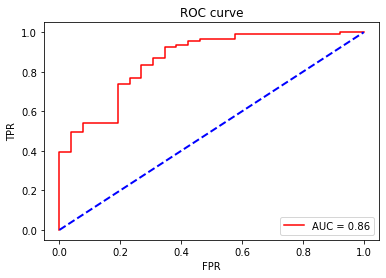

In [93]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model.predict_proba(X_test_rfe)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [94]:
roc_auc_score(y_test, preds)

0.8588334742180896

In [95]:
print(roc_auc_score(y_test, preds))
print(auc(fpr, tpr))

0.8588334742180896
0.8588334742180896


In [96]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.89      0.93      0.91        91

    accuracy                           0.85       117
   macro avg       0.80      0.76      0.77       117
weighted avg       0.85      0.85      0.85       117



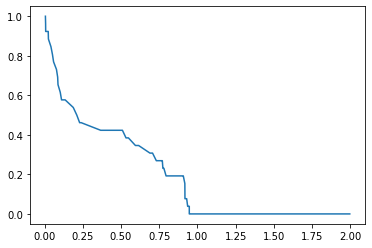

In [97]:
plt.plot(threshold,fpr)

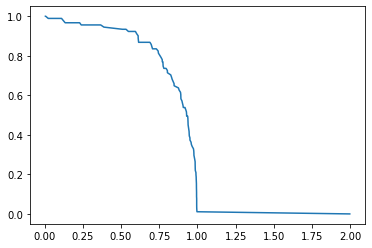

In [98]:
plt.plot(threshold,tpr)

In [99]:
from sklearn.metrics import precision_recall_curve
probs = model.predict_proba(X_test_rfe)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

(0.0, 1.0)

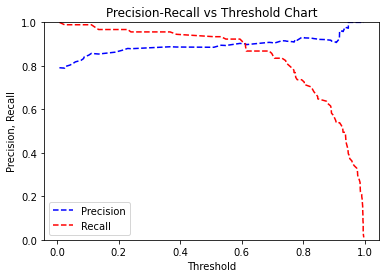

In [100]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1]) 

In [101]:
threshold = 0.6
pred2 = np.where(model.predict_proba(X_test_rfe)[:,1] >= threshold, 1, 0)

In [102]:
labels = [1, 0]
con_mat2 = confusion_matrix(y_test, pred2, labels = labels )
print(con_mat2)

[[83  8]
 [ 9 17]]


In [103]:
accuracy2=(con_mat2[0,0] + con_mat2[1,1])/y_test.size
print("Accuracy = ",accuracy2)
print("Model Score = ",model.score(X_test_rfe, y_test))
np.mean(y_test == pred2)

Accuracy =  0.8547008547008547
Model Score =  0.8547008547008547


0.8547008547008547

In [104]:
actual = y_test
predicted = pred2
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        26
           1       0.90      0.91      0.91        91

    accuracy                           0.85       117
   macro avg       0.79      0.78      0.79       117
weighted avg       0.85      0.85      0.85       117



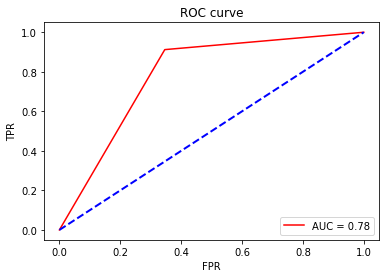

In [105]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs2 = model.predict_proba(X_test_rfe)
preds2 = probs[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, pred2, drop_intermediate=False)
roc_auc2 = auc(fpr2, tpr2)
plt.figure()
##Adding the ROC
plt.plot(fpr2, tpr2, 'r', label = 'AUC = %0.2f' % roc_auc2)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [106]:
print(roc_auc_score(y_test, pred2))
print(auc(fpr2, tpr2))

0.7829670329670328
0.7829670329670328


In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'),  param_grid)

In [109]:
clf.fit(X, y)

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [110]:
clf.best_score_

0.9111111111111111

In [111]:
clf.best_estimator_

LogisticRegression(C=1)

In [112]:
modelcv = LogisticRegression(C = 1, random_state = 10, class_weight='balanced', max_iter = 1000)
modelcv.fit(X,y)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=10)

In [113]:
modelcv.predict_proba(X_test_rfe)

array([[0.09414073, 0.90585927],
       [0.06211192, 0.93788808],
       [0.94095957, 0.05904043],
       [0.22563586, 0.77436414],
       [0.06211192, 0.93788808],
       [0.26863973, 0.73136027],
       [0.02354026, 0.97645974],
       [0.08194528, 0.91805472],
       [0.39763412, 0.60236588],
       [0.21909472, 0.78090528],
       [0.15268952, 0.84731048],
       [0.09206673, 0.90793327],
       [0.02277737, 0.97722263],
       [0.00612408, 0.99387592],
       [0.05290672, 0.94709328],
       [0.03927835, 0.96072165],
       [0.30194051, 0.69805949],
       [0.12394904, 0.87605096],
       [0.05431994, 0.94568006],
       [0.94858696, 0.05141304],
       [0.01398844, 0.98601156],
       [0.76014727, 0.23985273],
       [0.95827741, 0.04172259],
       [0.256762  , 0.743238  ],
       [0.29781778, 0.70218222],
       [0.00563222, 0.99436778],
       [0.9759919 , 0.0240081 ],
       [0.15209564, 0.84790436],
       [0.00531138, 0.99468862],
       [0.00450484, 0.99549516],
       [0.

In [114]:
modelcv.predict(X_test_rfe)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [115]:
print('classes: ',model.classes_)
print('coefficients: ',model.coef_)
print('intercept :',model.intercept_)

classes:  [0 1]
coefficients:  [[ 0.03582462  0.09083042  0.89126999 -1.0603262   0.73760725 -0.94821925
   0.41035934  0.6644457  -1.99859234 -0.04602216 -0.51387171 -0.13406312
   1.69709469 -0.5720405   1.20501184 -0.30164164 -0.02285517 -1.32589294
   1.63511358  1.12980235 -0.20568075  1.34100287 -0.50396907  0.53141581
   0.079463    0.53746077  1.09847958  0.56318468  0.78924429  0.60740204
   0.03915829  0.38533896  0.24873357 -0.39158982  0.38594861  0.35800743
   0.0936979   1.13707111  1.44407772  0.83126656  1.13151171  0.14517347
  -0.09229547  0.80295788  1.41876408 -0.12388887  0.23358143  0.93004641
   0.80521249  0.62566913 -0.51351975  0.04529729  0.28076877  0.35880879
  -0.91543815  0.3458263   0.59247086]]
intercept : [-2.1277935]


In [116]:
predcv = modelcv.predict(X_test_rfe)
labels = [1, 0]
con_mat_cv = confusion_matrix(y_test, predcv, labels = labels )
print(con_mat_cv)

[[85  6]
 [11 15]]


In [117]:
accuracy_cv=(con_mat_cv[0,0] + con_mat_cv[1,1])/y_test.size
print("Accuracy = ",accuracy_cv)
print("Model Score = ",modelcv.score(X_test_rfe, y_test))
np.mean(y_test == predcv)

Accuracy =  0.8547008547008547
Model Score =  0.8547008547008547


0.8547008547008547

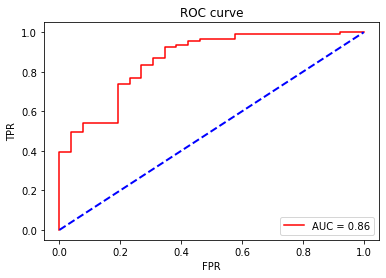

In [118]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probscv = modelcv.predict_proba(X_test_rfe)
predscv = probs[:,1]
fprcv, tprcv, thresholdcv = roc_curve(y_test, predscv, drop_intermediate=False)
roc_auccv = auc(fprcv, tprcv)
plt.figure()
##Adding the ROC
plt.plot(fprcv, tprcv, 'r', label = 'AUC = %0.2f' % roc_auccv)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.savefig('LogisticRegression ROC curve', dpi=300, bbox_inches='tight')
plt.show()

### Model LogisticRegression with GridCV gives the below metrics
### Accuracy = 0.863
### Confusion Matrix= [85  6]
###  --------------------------[ 10 16]
###  TP=85, TN= 16, FP=10, FN=6, N=117
### AUC= 0.86
### Precision= 0.89   
### Recall = 0.93
### Report for the same shown below

In [119]:
actual = y_test
predicted = predcv
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))
labels = [1, 0]
print(confusion_matrix(y_test, predcv,labels = labels))
report_dict = classification_report(actual, predicted,output_dict=True)
dfcv=pd.DataFrame(report_dict)

Report : 
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.89      0.93      0.91        91

    accuracy                           0.85       117
   macro avg       0.80      0.76      0.77       117
weighted avg       0.85      0.85      0.85       117

[[85  6]
 [11 15]]


In [120]:
df1cv=dfcv.T

In [121]:
df1cv=dfcv.T
import dataframe_image as dfi
dfi.export(df1cv, 'LR_Metrics.png')

In [122]:
#pip install dataframe_image


### here we have to limit false positive observation belonging to negative class and predicted incorrectly as positive

### false positive rate FPR = 0.38

### RandomForest

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, y)

rfc_pred = rfc.predict(X_test_rfe)

print(classification_report(y_test, rfc_pred))

labels = [1, 0]

print(confusion_matrix(y_test, rfc_pred,labels = labels))

report_dict_RF = classification_report(y_test, rfc_pred,output_dict=True)
dfrfc=pd.DataFrame(report_dict_RF)

              precision    recall  f1-score   support

           0       0.84      0.62      0.71        26
           1       0.90      0.97      0.93        91

    accuracy                           0.89       117
   macro avg       0.87      0.79      0.82       117
weighted avg       0.89      0.89      0.88       117

[[88  3]
 [10 16]]


In [124]:
df1rfc=dfrfc.T
import dataframe_image as dfi
dfi.export(df1rfc, 'RF_Metrics.png')

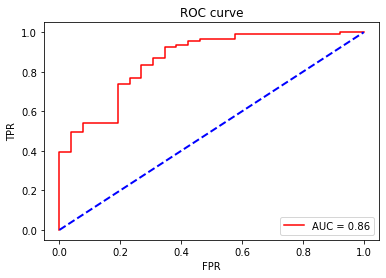

In [125]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probsrfc = rfc.predict_proba(X_test_rfe)
predsrfc = probs[:,1]
fprrfc, tprrfc, thresholdrfc = roc_curve(y_test, predsrfc, drop_intermediate=False)
roc_aucrfc = auc(fprrfc, tprrfc)
plt.figure()
##Adding the ROC
plt.plot(fprrfc, tprrfc, 'r', label = 'AUC = %0.2f' % roc_aucrfc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.savefig('RandomForest ROC curve', dpi=300, bbox_inches='tight')
plt.show()

### KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

<AxesSubplot:>

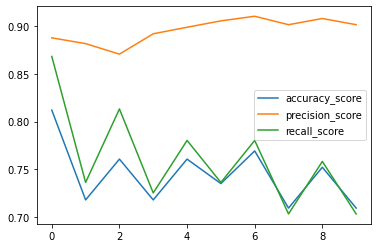

In [128]:
error_rate = []

for i in range(1,11):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred_i = knn.predict(X_test_rfe)
    error_rate.append([accuracy_score(y_test, pred_i), precision_score(y_test, pred_i), 
                       recall_score(y_test, pred_i)])

error_rate = pd.DataFrame(error_rate, columns=['accuracy_score', 'precision_score', 'recall_score'])
error_rate.plot()

In [129]:
knn_model = KNeighborsClassifier(n_neighbors=110, weights = 'distance')
knn_model.fit(X,y)

knn_pred = knn_model.predict(X_test_rfe)
labels = [1, 0]
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred,labels = labels))
report_dict_knn = classification_report(y_test, knn_pred,output_dict=True)
dfknn=pd.DataFrame(report_dict_knn)

              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.91      0.92      0.92        91

    accuracy                           0.87       117
   macro avg       0.82      0.81      0.81       117
weighted avg       0.87      0.87      0.87       117

[[84  7]
 [ 8 18]]


In [130]:
df1knn=dfknn.T
import dataframe_image as dfi
dfi.export(df1knn, 'KNN_Metrics.png')

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {'n_neighbors':range(1,150),
          'weights':['uniform', 'distance']
         }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=kfold)
model.fit(X, y)

model.best_params_

{'n_neighbors': 100, 'weights': 'distance'}

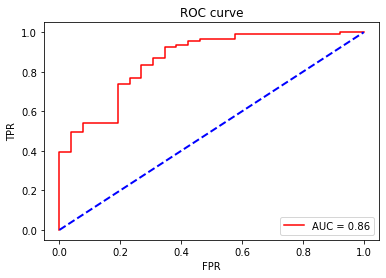

In [132]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probsknn = knn_model.predict_proba(X_test_rfe)
predsknn = probs[:,1]
fprknn, tprknn, thresholdknn = roc_curve(y_test, predsknn, drop_intermediate=False)
roc_aucknn = auc(fprknn, tprknn)
plt.figure()
##Adding the ROC
plt.plot(fprknn, tprknn, 'r', label = 'AUC = %0.2f' % roc_aucknn)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.savefig('KNN ROC curve', dpi=300, bbox_inches='tight')
plt.show()

### RandomForest Model is better for churn prediction
### Accuracy = 0.87
### Confusion Matrix= [86  5]
###  --------------------------[ 10 16]
###  TP=86, TN= 16, FP=10, FN=5, N=117
### AUC= 0.86
### Precision= 0.90   
### Recall = 0.95

In [133]:
from tkinter import *
from tkinter.messagebox import *
from PIL import ImageTk, Image
root = Tk()

root.geometry=('300 X 300')
root.title("Churn Prediction")
#app = tk.Tk()
#root.title("Dynamically resize background Image")
def event1():
    newWindow1 = Toplevel(root)
    #newWindow1.geometry=('300 X 300')
    newWindow1.title("Model 1 builded using LogisticRegression")
    # open image file
    bg1 = ImageTk.PhotoImage(file="LogisticRegression ROC curve.png")
    # create canvas
    canvas1 = Canvas(newWindow1, width=500, height=500)
    canvas1.pack(fill=BOTH, expand=True)
    # place the image inside canvas
    canvas1.create_image(0, 0, image=bg1, anchor='nw')
    # resize function for resizing the image
    # with proper width and height of root window
    def resize_bg1(event):
        global bgg1, resized1, bg21
        # open image to resize it
        bgg1 = Image.open("LogisticRegression ROC curve.png")
        # resize the image with width and height of root
        resized1 = bgg1.resize((event.width, event.height),Image.ANTIALIAS)
    
        bg21 = ImageTk.PhotoImage(resized1)
        canvas1.create_image(0, 0, image=bg21, anchor=NW)
    # bind resized function with root window

    newWindow1.bind("<Configure>", resize_bg1)
    
   
    label1 = Label(newWindow1, text ="Accuracy = 0.863, AUC= 0.86, Precision= 0.89, Recall = 0.93")
    label1.config(font=("bold", 15))
    label1.pack()
    
    
    


def event11():
    newWindow2 = Toplevel(root)
    #newWindow2.geometry=('300 X 300')
    newWindow2.title("Model 2 builded using RandomForestRegressor")
    # open image file
    bg2 = ImageTk.PhotoImage(file="RandomForest ROC curve.png")
    # create canvas
    canvas2 = Canvas(newWindow2, width=500, height=500)
    canvas2.pack(fill=BOTH, expand=True)
    # place the image inside canvas
    canvas2.create_image(0, 0, image=bg2, anchor=NW)
    # resize function for resizing the image
    # with proper width and height of root window
    def resize_bg2(event):
        global bgg2, resized2, bg22
        # open image to resize it
        bgg2 = Image.open("RandomForest ROC curve.png")
        # resize the image with width and height of root
        resized2 = bgg2.resize((event.width, event.height),Image.ANTIALIAS)
    
        bg22 = ImageTk.PhotoImage(resized2)
        canvas2.create_image(0, 0, image=bg22, anchor=NW)
    # bind resized function with root window

    newWindow2.bind("<Configure>", resize_bg2)
    
    label2 = Label(newWindow2, text ="Accuracy = 0.87, AUC= 0.86, Precision= 0.90, Recall = 0.95")
    label2.config(font=("bold", 15))
    label2.pack()
    
    
    

b1=Button(root,text='Model 1 LR ROC and MetricsC',command=event1).pack(side = LEFT)
#b2=Button(root,text='Model 1 LR Metrics',command=event2).pack(side = LEFT)
#b2=Button(root,text='Model 1 Metrics',command=event2).pack(side = LEFT)
b11=Button(root,text='Model 2 RF ROC and Metrics',command=event11).pack(side = RIGHT)
#b22=Button(root,text='Model 2 Metrics',command=event22).pack(side = RIGHT)
#b111=Button(root,text='Model 3 KNN Graph and Metrics',command=event111).pack(side = RIGHT)

root.mainloop()